<a href="https://colab.research.google.com/github/KaracsonPeter/Optimize-Food-Intake/blob/main/nutritions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [342]:
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
import pandas as pd
from scipy.optimize import minimize
import math 

In [159]:
data = {"Shredded coconut": [635.00, 63.00, 8.00, 6.40, 6.40, 6.20, 0.08, 20.00, 0.337, 0.015, 0.107, 0.05, 0.0019, 0.0018,
                      0.0025, 0.0003, 0.000016700, 0.000007, 0.00003, 0.0007, 0.0004, 0.0005, 0.0007, 0.0003, 0.00,
                      0.00, 0.00, 0.000008, 0.00, 0.000000300, 0.00],
 "Almond flour": [628.00, 56.00, 4.50, 4.00, 4.00, 21.00, 0.00, 9.30, 0.705, 0.232, 0.512, 0.251, 0.00322, 0.0028,
                  0.00181, 0.000975, 0.000007, 0.000036, 0.000026, 0.00, 0.0242, 0.004, 0.0004, 0.0001, 0.000748,
                  0.000112, 0.000069100, 0.000038, 0.000001, 0.000006900, 0.00],
 "Sunflower seed flour": [371.00, 11.23, 1.00, 17.23, 6.12, 36.04, 0.03, 24.50, 0.067, 0.114, 0.689, 0.346, 0.006,
                          0.005, 0.0025, 0.00175, 0.000065, 0.000007300, 0.000036, 0.0013, 0.0252, 0.007, 0.00074,
                          0.00055, 0.0004, 0.0004, 0.00047, 0.0002, 0.000001, 0.000001, 0.00],
 "Yellow flaxseed meal": [362.00, 7.20, 1.80, 2.90, 2.70, 36.90, 0.15, 34.90, 0.813, 0.255, 0.642, 0.392, 0.0057,
                          0.0043, 0.0025, 0.0012, 0.000025400, 0.000007500, 0.00031, 0.0006, 0.0023, 0.0031, 0.001,
                          0.0005, 0.0002, 0.0016, 0.00, 0.000087, 0.00, 0.000004300, 0.00],
 "Flaxseed meal": [362.00, 32.00, 4.00, 30.00, 0.00, 24.00, 0.02, 27.00, 0.813, 0.255, 0.642, 0.392, 0.0057, 0.0043,
                   0.0025, 0.0012, 0.000025400, 0.000008400, 0.000031, 0.0006, 0.0003, 0.0031, 0.001, 0.0005, 0.0002,
                   0.0016, 0.00, 0.000087, 0.00, 0.000004300, 0.00],
 "Soy flour": [316.00, 2.00, 0.40, 16.60, 0.40, 46.00, 0.01, 17.00, 2.384, 0.241, 0.674, 0.29, 0.0092, 0.0025, 0.003,
               0.0041, 0.000001700, 0.000011, 0.000087, 0.00, 0.0001, 0.0026, 0.002, 0.0006, 0.0003, 0.0007, 0.0015,
               0.000305, 0.000145, 0.000004100, 0.00],
 "Chicory": [328.00, 0.00, 0.00, 68.00, 11.00, 4.10, 0.27, 20.00, 3.395, 0.103, 0.271, 0.213, 0.0048, 0.0004, 0.0012,
             0.0001, 0.000009400, 0.000006, 0.000002900, 0.0022, 0.0001, 0.0217, 0.0001, 0.00, 0.0003, 0.00, 0.00, 0.00,
             0.00, 0.00018, 0.00],
 "Carob powder": [293.00, 0.00, 0.00, 51.00, 37.70, 4.46, 0.03, 35.60, 0.827, 0.348, 0.079, 0.054, 0.0029, 0.0009,
                  0.0005, 0.0006, 0.000005300, 0.000008, 0.00003, 0.0002, 0.0006, 0.0019, 0.00, 0.0004, 0.0005, 0.0001,
                  0.00, 0.000029, 0.00005, 0.00, 0.00],
 "Cocoa powder": [368.00, 21.00, 13.00, 8.90, 0.60, 20.00, 0.07, 35.00, 1.524, 0.128, 0.734, 0.50, 0.0139, 0.0068,
                  0.0038, 0.0038, 0.000014300, 0.000009, 0.000002600, 0.0005, 0.0001, 0.0022, 0.0003, 0.0001, 0.0002,
                  0.0001, 0.0006, 0.000032, 0.00, 0.000002500, 0.00],
 "Sesame seed flour": [412.00, 15.30, 2.67, 14.80, 0.00, 51.50, 0.10, 14.60, 0.397, 0.149, 0.757, 0.338, 0.0142, 0.01,
                       0.0014, 0.0014, 0.000034400, 0.000007600, 0.00009, 0.00, 0.0018, 0.0125, 0.0027, 0.0001, 0.0003,
                       0.0025, 0.0008, 0.000029, 0.000228, 0.000004800, 0.00],
 "Chickpea flour": [343.00, 6.20, 0.00, 48.70, 5.00, 19.20, 0.007, 20.893, 0.846, 0.045, 0.318, 0.166, 0.0049, 0.0028,
                    0.0016, 0.0009, 0.000008300, 0.000011, 0.00036, 0.00, 0.0008, 0.0018, 0.0006, 0.0005, 0.0001,
                    0.0005, 0.00069, 0.000437, 0.00015, 0.000009100, 0.000000540],
 "Chestnut flour": [372.00, 3.60, 0.60, 74.00, 24.00, 6.30, 0.01, 9.40, 0.991, 0.064, 0.137, 0.074, 0.0024, 0.0004,
                    0.0012, 0.0007, 0.000009900, 0.000009, 0.000014, 0.0151, 0.0024, 0.0009, 0.0009, 0.0007, 0.0001,
                    0.0004, 0.0006, 0.00011, 0.00, 0.000005, 0.00],
 "Walnut flour": [408.00, 13.80, 1.40, 19.70, 7.20, 45.50, 0.0282, 12.3718, 0.513, 0.061, 0.513, 0.201, 0.0031, 0.0034,
                  0.0039, 0.0014, 0.000017, 0.000007700, 0.000023, 0.0017, 0.0018, 0.0005, 0.0017, 0.0006, 0.0001,
                  0.0001, 0.0004, 0.000031, 0.000145, 0.000002700, 0.00],
 "Oat flour": [373.00, 7.00, 1.30, 59.10, 1.10, 13.00, 0.03, 10.20, 0.371, 0.055, 0.452, 0.144, 0.0038, 0.00284, 0.004,
               0.000411, 0.000029, 0.000164, 0.000034, 0.00, 0.0006, 0.000926, 0.0011, 0.000119, 0.0003, 0.000334,
               0.000022, 0.00003, 0.000001, 0.000002200, 0.000000540],
 "Dried strawberries": [346.00, 3.30, 0.30, 77.40, 63.40, 4.70, 0.04, 7.50, 0.68, 0.153, 0.104, 0.07, 0.0032, 0.0008,
                        0.0013, 0.0003, 0.000000600, 0.000003300, 0.000000100, 0.109, 0.0007, 0.0009, 0.0004, 0.0003,
                        0.0002, 0.0001, 0.000001300, 0.000042, 0.000002, 0.000003300, 0.00],
 "Banana chips": [519.00, 34.10, 28.70, 54.50, 34.30, 2.30, 0.04, 4.40, 0.536, 0.018, 0.056, 0.076, 0.0013, 0.0007,
                  0.0009, 0.0002, 0.000001500, 0.000001100, 0.000000100, 0.004, 0.00025, 0.0007, 0.0005, 0.0003,
                  0.00001, 0.0001, 0.00, 0.00002, 0.0003, 0.000001300, 0.00],
 "Peanuts": [623.00, 52.00, 9.00, 24.00, 6.00, 25.00, 0.10, 8.20, 0.755, 0.123, 0.31, 0.173, 0.0044, 0.0025, 0.0055,
             0.0018, 0.000004100, 0.00011, 0.00003, 0.000003800, 0.0153, 0.0021, 0.0009, 0.0006, 0.0001, 0.0003, 0.0006,
             0.000088, 0.00022, 0.000013500, 0.00]
        }

index = ["Energy", "Fat", "Saturated fat", "Carbohydrate", "Sugar", "Protein", "Salt", "Dietary fiber",
         "K", "Ca", "P", "Mg", "Fe", "Zn", "Mn", "Cu", "Se", "Mo", "Cr",
         "C", "E", "B3", "B5", "B6", "B2", "B1", "B7", "B9", "A", "K", "B12"]

nutritions = pd.DataFrame(data=data, index=index)

In [46]:
nutritions


,Shredded coconut,Almond flour,Sunflower seed flour,Yellow flaxseed meal,Flaxseed meal,Soy flour,Chicory,Carob powder,Cocoa powder,Sesame seed flour,Chickpea flour,Chestnut flour,Walnut flour,Oat flour,Dried strawberries,Banana chips,Peanuts
Energy,6.350000e+02,628.000000,371.000000,362.000000,362.000000,316.000000,328.000000,293.000000,368.000000,412.000000,3.430000e+02,372.000000,408.000000,3.730000e+02,3.460000e+02,5.190000e+02,623.000000
Fat,6.300000e+01,56.000000,11.230000,7.200000,32.000000,2.000000,0.000000,0.000000,21.000000,15.300000,6.200000e+00,3.600000,13.800000,7.000000e+00,3.300000e+00,3.410000e+01,52.000000
Saturated fat,8.000000e+00,4.500000,1.000000,1.800000,4.000000,0.400000,0.000000,0.000000,13.000000,2.670000,0.000000e+00,0.600000,1.400000,1.300000e+00,3.000000e-01,2.870000e+01,9.000000
Carbohydrate,6.400000e+00,4.000000,17.230000,2.900000,30.000000,16.600000,68.000000,51.000000,8.900000,14.800000,4.870000e+01,74.000000,19.700000,5.910000e+01,7.740000e+01,5.450000e+01,24.000000
Sugar,6.400000e+00,4.000000,6.120000,2.700000,0.000000,0.400000,11.000000,37.700000,0.600000,0.000000,5.000000e+00,24.000000,7.200000,1.100000e+00,6.340000e+01,3.430000e+01,6.000000
Protein,6.200000e+00,21.000000,36.040000,36.900000,24.000000,46.000000,4.100000,4.460000,20.000000,51.500000,1.920000e+01,6.300000,45.500000,1.300000e+01,4.700000e+00,2.300000e+00,25.000000
Salt,8.000000e-02,0.000000,0.030000,0.150000,0.020000,0.010000,0.270000,0.030000,0.070000,0.100000,7.000000e-03,0.010000,0.028200,3.000000e-02,4.000000e-02,4.000000e-02,0.100000
Dietary fiber,2.000000e+01,9.300000,24.500000,34.900000,27.000000,17.000000,20.000000,35.600000,35.000000,14.600000,2.089300e+01,9.400000,12.371800,1.020000e+01,7.500000e+00,4.400000e+00,8.200000
K,3.370000e-01,0.705000,0.067000,0.813000,0.813000,2.384000,3.395000,0.827000,1.524000,0.397000,8.460000e-01,0.991000,0.513000,3.710000e-01,6.800000e-01,5.360000e-01,0.755000
Ca,1.500000e-02,0.232000,0.114000,0.255000,0.255000,0.241000,0.103000,0.348000,0.128000,0.149000,4.500000e-02,0.064000,0.061000,5.500000e-02,1.530000e-01,1.800000e-02,0.123000


In [160]:
RDI = [2000, 68.5, 20, 275, 50, 50, 5.75, 25, 4.7, 1.3, 1.25, 0.42, 0.018, 0.011, 0.0023, 0.0009, 0.000055, 0.000045, 0.000035, 0.06, 0.02, 0.0016, 0.01, 0.002, 0.0017, 0.0015, 0.0003, 0.0004, 0.0009, 0.00008, 0.000006]

RDI = pd.DataFrame(data={"RDI": RDI}, index=index)

In [48]:
RDI

,RDI
Energy,2000.000000
Fat,68.500000
Saturated fat,20.000000
Carbohydrate,275.000000
Sugar,50.000000
Protein,50.000000
Salt,5.750000
Dietary fiber,25.000000
K,4.700000
Ca,1.300000


In [161]:
nutritions_RDI = nutritions.div(RDI['RDI'], axis=0)
nutritions_RDI

,Shredded coconut,Almond flour,Sunflower seed flour,Yellow flaxseed meal,Flaxseed meal,Soy flour,Chicory,Carob powder,Cocoa powder,Sesame seed flour,Chickpea flour,Chestnut flour,Walnut flour,Oat flour,Dried strawberries,Banana chips,Peanuts
Energy,0.317500,0.314000,0.185500,0.181000,0.181000,0.158000,0.164000,0.146500,0.184000,0.206000,0.171500,0.186000,0.204000,0.186500,0.173000,0.259500,0.311500
Fat,0.919708,0.817518,0.163942,0.105109,0.467153,0.029197,0.000000,0.000000,0.306569,0.223358,0.090511,0.052555,0.201460,0.102190,0.048175,0.497810,0.759124
Saturated fat,0.400000,0.225000,0.050000,0.090000,0.200000,0.020000,0.000000,0.000000,0.650000,0.133500,0.000000,0.030000,0.070000,0.065000,0.015000,1.435000,0.450000
Carbohydrate,0.023273,0.014545,0.062655,0.010545,0.109091,0.060364,0.247273,0.185455,0.032364,0.053818,0.177091,0.269091,0.071636,0.214909,0.281455,0.198182,0.087273
Sugar,0.128000,0.080000,0.122400,0.054000,0.000000,0.008000,0.220000,0.754000,0.012000,0.000000,0.100000,0.480000,0.144000,0.022000,1.268000,0.686000,0.120000
Protein,0.124000,0.420000,0.720800,0.738000,0.480000,0.920000,0.082000,0.089200,0.400000,1.030000,0.384000,0.126000,0.910000,0.260000,0.094000,0.046000,0.500000
Salt,0.013913,0.000000,0.005217,0.026087,0.003478,0.001739,0.046957,0.005217,0.012174,0.017391,0.001217,0.001739,0.004904,0.005217,0.006957,0.006957,0.017391
Dietary fiber,0.800000,0.372000,0.980000,1.396000,1.080000,0.680000,0.800000,1.424000,1.400000,0.584000,0.835720,0.376000,0.494872,0.408000,0.300000,0.176000,0.328000
K,0.071702,0.150000,0.014255,0.172979,0.172979,0.507234,0.722340,0.175957,0.324255,0.084468,0.180000,0.210851,0.109149,0.078936,0.144681,0.114043,0.160638
Ca,0.011538,0.178462,0.087692,0.196154,0.196154,0.185385,0.079231,0.267692,0.098462,0.114615,0.034615,0.049231,0.046923,0.042308,0.117692,0.013846,0.094615


In [162]:
base = nutritions_RDI[:][:8]
minerals = nutritions_RDI[:][8:19]
vitamins = nutritions_RDI[:][19:]

In [51]:
base

,Shredded coconut,Almond flour,Sunflower seed flour,Yellow flaxseed meal,Flaxseed meal,Soy flour,Chicory,Carob powder,Cocoa powder,Sesame seed flour,Chickpea flour,Chestnut flour,Walnut flour,Oat flour,Dried strawberries,Banana chips,Peanuts
Energy,0.317500,0.314000,0.185500,0.181000,0.181000,0.158000,0.164000,0.146500,0.184000,0.206000,0.171500,0.186000,0.204000,0.186500,0.173000,0.259500,0.311500
Fat,0.919708,0.817518,0.163942,0.105109,0.467153,0.029197,0.000000,0.000000,0.306569,0.223358,0.090511,0.052555,0.201460,0.102190,0.048175,0.497810,0.759124
Saturated fat,0.400000,0.225000,0.050000,0.090000,0.200000,0.020000,0.000000,0.000000,0.650000,0.133500,0.000000,0.030000,0.070000,0.065000,0.015000,1.435000,0.450000
Carbohydrate,0.023273,0.014545,0.062655,0.010545,0.109091,0.060364,0.247273,0.185455,0.032364,0.053818,0.177091,0.269091,0.071636,0.214909,0.281455,0.198182,0.087273
Sugar,0.128000,0.080000,0.122400,0.054000,0.000000,0.008000,0.220000,0.754000,0.012000,0.000000,0.100000,0.480000,0.144000,0.022000,1.268000,0.686000,0.120000
Protein,0.124000,0.420000,0.720800,0.738000,0.480000,0.920000,0.082000,0.089200,0.400000,1.030000,0.384000,0.126000,0.910000,0.260000,0.094000,0.046000,0.500000
Salt,0.013913,0.000000,0.005217,0.026087,0.003478,0.001739,0.046957,0.005217,0.012174,0.017391,0.001217,0.001739,0.004904,0.005217,0.006957,0.006957,0.017391
Dietary fiber,0.800000,0.372000,0.980000,1.396000,1.080000,0.680000,0.800000,1.424000,1.400000,0.584000,0.835720,0.376000,0.494872,0.408000,0.300000,0.176000,0.328000


In [281]:
prices = [2000.0, 8566.0, 1510.0, 1400.0, 1300.0, 1520.0, 8000.0, 1800.0, 
          9000.0, 2150.0, 2150.0, 5000.0, 1800.0, 1260.0, 
          32000.0, 6500.0, 1500.0]

In [164]:
# Drop rows which would ruin optimization due to major deficit
# base = base.drop(["Saturated fat"])
# base = base.drop(["Sugar"])
base = base.drop(["Salt"])
vitamins = vitamins.drop(["B12"])

## Initialization

In [54]:
# Ensure the total number of units is not greater than "max_sum"
max_sum = 20
def constraint(x):
  return sum(x) - max_sum

upper_bound = 5.0
bounds = [(0.0, upper_bound)] * len(nutritions.columns)

W_price = 0.0007
W_base = 1.0
W_minerals = 0.37
W_vitamins = 0.05

optimum = 1.0  # 100% of RDI

# Define the objective function to minimize the distance from the optimal amounts
def objective(x, log):
  err_price = sum(prices * x * W_price)  # Total price of mixture

  roughness = 1
  err_base = W_base * (base * x)
  sum_of_rows_base = err_base.sum(axis=1)
  # err_base = abs((1 - sum_of_rows_base)).sum(axis=0)
  err_base = ((1 - sum_of_rows_base)**(2*roughness)).sum(axis=0)

  err_minerals = W_minerals * (minerals * x)
  sum_of_rows_minerals = err_minerals.sum(axis=1)
  err_minerals = abs((1 - sum_of_rows_minerals)).sum(axis=0)
  # err_minerals = ((1 - sum_of_rows_minerals)**2).sum(axis=0)

  err_vitamins = W_vitamins * (vitamins * x)
  sum_of_rows_vitamins = err_vitamins.sum(axis=1)
  err_vitamins = ((1 - sum_of_rows_vitamins)**2).sum(axis=0)

  loss = err_base 
  # loss = loss + err_price 
  loss = loss + err_minerals 
  # loss = loss + err_vitamins
  if log["iter"]%100 == 0:
    print(f'Loss at iteration {log["iter"]} = {loss}! Mineral error importance: {W_minerals}.')
  log["iter"] += 1
  return loss

## Optimizing

In [ ]:
iters = 2
cols = len(base.columns)
x0 = [1 / cols] * cols

for i in range(iters):
  result = minimize(objective, x0, args=({"iter": 0}, ),
                  bounds=bounds, 
                  constraints={'type': 'ineq'},
                  method='Nelder-Mead',
                  options={"maxiter": 1000})
  x0 = result.x
  result = minimize(objective, x0, args=({"iter": 0}, ),
                    bounds=bounds, 
                    constraints={'type': 'ineq', 
                                 'fun': constraint},
                    method='L-BFGS-B',
                    options={"maxiter": 1000})
  x0 = result.x

In [ ]:
for i in result.x:
  print("%.10f" % i)

In [182]:
mineral_upper_limit_as_times_RDI = [31.91, 1.92, 3.20, 4.76, 2.50, 4.55, 3.91, 5.56, 5.45, 37.78, 28.57]
vitamin_upper_limit_as_times_RDI = [28.33, 50.00, 21.88, 100.00, 50.00, 100.00, 100.00, 100.00, 2.50, 38.89, 100.00, 100.00]
mixture = (result.x * nutritions).sum(axis=1)
mixture_minerals = mixture[8:19]
mixture_vitamins = mixture[19:]
mixture_minerals

K     3.096054
Ca    0.382804
P     1.172490
Mg    0.551966
Fe    0.015536
Zn    0.007675
Mn    0.010578
Cu    0.004390
Se    0.000037
Mo    0.000220
Cr    0.000171
dtype: float64

In [183]:
for i, m in enumerate(mixture_minerals):
  upper = mineral_upper_limit_as_times_RDI[i]
  if upper < m:
    print(f'{i}. mineral is overdosed by {upper/m}. Upper limit: {upper}; Actual: {m}')

for i, m in enumerate(mixture_vitamins):
  upper = vitamin_upper_limit_as_times_RDI[i]
  if upper < m:
    print(f'{i + 1}. vitamin is overdosed by {upper/m}. Upper limit: {upper}; Actual: {m}')

### Automate fincding recipes
Generate a bunck of recipes by changing the strictness of mineral error handling.

In [200]:
# Initialize
ingredients = ["Shredded coconut", "Almond flour", "Sunflower seed flour", 
               "Yellow flaxseed meal", "Flaxseed meal", "Soy flour", "Chicory", 
               "Carob powder", "Cocoa powder", "Sesame seed flour", 
               "Chickpea flour", "Chestnut flour", "Walnut flour", "Oat flour", 
               "Dried strawberries", "Banana chips", "Peanuts"]
large_iterations = 2
step = 0.005
W_minerals = 0.2
iters = 2
maxiter = 2000
cols = len(base.columns)

In [316]:
def optimze_food(objective_function, 
                 price_weight, 
                 price_optimum,
                 base_weight, 
                 mineral_weight, 
                 vitamin_weight,
                 optimum,  # 100% of RDI
                 optimization_loops,
                 step):
  mixtures = {}
  error_functions = []
  for i in range(optimization_loops):
    x0 = [1 / cols] * cols

    for i in range(iters):
      result = minimize(objective_function, x0, args=({"iter": 0},
                                                      price_weight, 
                                                      base_weight, 
                                                      mineral_weight, 
                                                      vitamin_weight,
                                                      optimum,
                                                      price_optimum
                                                      ),
                      bounds=bounds, 
                      constraints={'type': 'ineq'},
                      method='Nelder-Mead',
                      options={"maxiter": maxiter})
      x0 = result.x
      result = minimize(objective_function, x0, args=({"iter": 0}, 
                                                      price_weight, 
                                                      base_weight, 
                                                      mineral_weight, 
                                                      vitamin_weight,
                                                      optimum,
                                                      price_optimum
                                                      ),
                        bounds=bounds, 
                        constraints={'type': 'ineq', 
                                    'fun': constraint},
                        method='L-BFGS-B',
                        options={"maxiter": maxiter})
      x0 = result.x

    mixtures.update({mineral_weight: result.x.tolist()})
    error_functions.append(result.fun)
    mineral_weight += step

  return {"res": pd.DataFrame(data=mixtures, 
                       columns=mixtures, 
                       index=ingredients).transpose(), 
          "err": error_functions}

By raising importance of appropriate vitamin intake, specific ingredients which has way more vitamin than RDI (such as chickpea has 1029% of RDI chromium intake), slowly get whiped out by optimization.  
This is not that great if we are take overdose limites into account.  
Some of the ingredients are barely used:

## Modify objective function to be less strict according to overdose limites

In [345]:
def objective_overdose(x, log, price_weight, base_weight, mineral_weight, 
                       vitamin_weight, optimum, price_optimum):
  roughness = 1
  log_offset = 0.1

  err_base = base_weight * (base * x)
  sum_of_rows_base = err_base.sum(axis=1)
  err_base = ((optimum - sum_of_rows_base)**(2*roughness)).sum(axis=0)
  loss = err_base
  log_msg = f'Errors: Base = {err_base}, '

  if price_weight > 0.000001:
    price_optimum *= 10  # 10 * 100g = 1kg
    curr_price = sum(prices * x)
    err_price = log_offset + math.log(1 + abs(price_optimum - curr_price)) * price_weight
    if curr_price < price_optimum:
      err_price = log_offset
    """
    avg_price = sum(prices) / len(prices)
    curr_avg_prices = sum(prices * x) / len(prices)
    err_price = abs(curr_avg_prices - avg_price) * price_weight
    """
    #err_price = sum(prices * x * price_weight)  # Total price of mixture
    loss = loss + err_price
    log_msg +=  f'Price = {err_price}, '

  if mineral_weight > 0.00001:
    err_minerals = mineral_weight * (minerals * x)
    sum_of_rows_minerals = err_minerals.sum(axis=1)
    overdose_likelihood = [2/limit for limit in mineral_upper_limit_as_times_RDI]
    raw_mineral_error = (optimum - sum_of_rows_minerals) * overdose_likelihood
    err_minerals = abs(raw_mineral_error).sum(axis=0)
    loss = loss + err_minerals
    log_msg += f'Minerals = {err_minerals}, '

  if vitamin_weight > 0.00001:
    err_vitamins = vitamin_weight * (vitamins * x)
    sum_of_rows_vitamins = err_vitamins.sum(axis=1)
    overdose_likelihood = [2/limit for limit in vitamin_upper_limit_as_times_RDI]
    raw_vitamin_error = (optimum - sum_of_rows_vitamins) * overdose_likelihood
    err_vitamins = abs(raw_vitamin_error).sum(axis=0)
    loss = loss + err_vitamins
    log_msg = f'Vitamins = {err_vitamins}, '

  if log["iter"]%100 == 0:
    print(f'Loss at iteration {log["iter"]} = {loss}!' + log_msg)
  log["iter"] += 1
  return loss

In [346]:
mixtures_df = optimze_food(objective_function=objective_overdose,
                           price_weight=0.001,
                           price_optimum=2000,
                           base_weight=1.0, 
                           mineral_weight=0.1, 
                           vitamin_weight=0.0,
                           optimum=1.0,  # 100% of RDI
                           optimization_loops=18,
                           step=0.05
                           )

Loss at iteration 0 = 8.105997402516385!Errors: Base = 3.475503886146929, Price = 0.1, Minerals = 4.530493516369456, 
Loss at iteration 100 = 7.9405062295937!Errors: Base = 3.3222616779545078, Price = 0.1, Minerals = 4.518244551639191, 
Loss at iteration 200 = 6.357904834898699!Errors: Base = 1.8516686375561546, Price = 0.1, Minerals = 4.406236197342544, 
Loss at iteration 300 = 5.286076359381287!Errors: Base = 0.9665595021466069, Price = 0.1, Minerals = 4.21951685723468, 
Loss at iteration 400 = 5.212321711260461!Errors: Base = 0.9092466530006974, Price = 0.1, Minerals = 4.203075058259764, 
Loss at iteration 500 = 4.8775848196227996!Errors: Base = 0.6182231309399372, Price = 0.1, Minerals = 4.159361688682862, 
Loss at iteration 600 = 4.73092890472284!Errors: Base = 0.4823695276151363, Price = 0.10842790473418859, Minerals = 4.140131472373516, 
Loss at iteration 700 = 4.720396707629318!Errors: Base = 0.4641678902393299, Price = 0.10826407994758841, Minerals = 4.1479647374424, 
Loss at 

In [347]:
mixtures_df["res"]

,Shredded coconut,Almond flour,Sunflower seed flour,Yellow flaxseed meal,Flaxseed meal,Soy flour,Chicory,Carob powder,Cocoa powder,Sesame seed flour,Chickpea flour,Chestnut flour,Walnut flour,Oat flour,Dried strawberries,Banana chips,Peanuts
0.10,7.447394e-07,5.444082e-08,5.210298e-05,0.000000e+00,9.951753e-07,1.490454e-05,1.508123e-05,1.428299e-06,6.387936e-06,0.000005,0.000000e+00,1.094705e-01,6.299928e-05,2.156271e+00,0.414164,0.339124,8.511538e-01
0.15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.278170e+00,0.501318,0.301317,9.002237e-01
0.20,2.931446e-10,1.888532e-08,1.166083e-08,2.359482e-09,1.997674e-09,2.286669e-01,2.383506e-09,0.000000e+00,2.124641e-09,0.000000,3.459512e-09,1.285775e+00,1.740498e-08,9.182568e-01,0.037680,0.329449,9.550097e-01
0.25,0.000000e+00,2.711894e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.210788e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.197122,0.000000e+00,1.322189e+00,0.000000e+00,8.387085e-01,0.000581,0.453271,4.399601e-01
0.30,0.000000e+00,3.611207e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.810471e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.528879,0.000000e+00,1.433702e+00,0.000000e+00,6.118290e-01,0.000000,0.445093,3.088789e-01
0.35,0.000000e+00,5.958872e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.533433,0.000000e+00,1.197166e+00,0.000000e+00,6.929286e-01,0.049830,0.520149,1.023937e-03
0.40,0.000000e+00,5.370269e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.574886e-06,1.615286e-01,0.000000e+00,0.000000e+00,0.706029,0.000000e+00,4.100065e-01,0.000000e+00,5.416130e-01,0.344278,0.544516,0.000000e+00
0.45,4.141065e-06,5.569945e-01,4.318395e-06,1.238374e-04,1.338014e-05,3.953457e-06,3.749104e-01,1.691341e-06,2.741212e-05,0.702523,1.974495e-05,4.947102e-02,8.875223e-05,3.934734e-01,0.422740,0.561067,4.850828e-05
0.50,1.496144e-05,5.583636e-01,2.625816e-06,9.931765e-06,1.076495e-05,1.273747e-05,4.785745e-01,4.688843e-06,8.536712e-06,0.748217,1.108848e-04,9.271786e-06,5.003587e-05,2.262540e-01,0.426278,0.564266,0.000000e+00
0.55,9.710987e-07,4.724680e-01,1.819188e-05,2.507244e-06,2.345945e-05,5.956314e-04,3.504270e-01,1.445821e-04,1.036318e-04,0.802865,1.177335e-04,6.217454e-01,7.574949e-04,7.926745e-02,0.135446,0.596374,1.210937e-04


In [348]:
mixtures_df["res"] = mixtures_df["res"] * 100

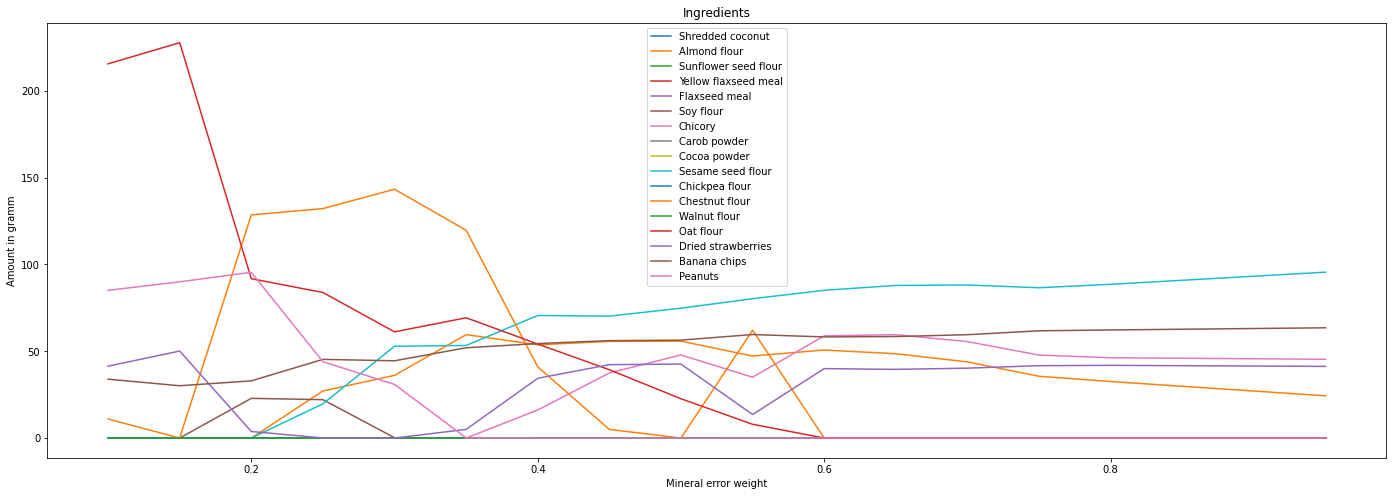

In [349]:
ax = plt.gca()
mixtures_df["res"].reset_index().plot(
    x="index",
    xlabel="Mineral error weight",
    y=mixtures_df["res"].columns,
    ylabel="Amount in gramm",
    kind="line",
    ax=ax,
    figsize=(24, 8))

plt.title('Ingredients')

plt.show()

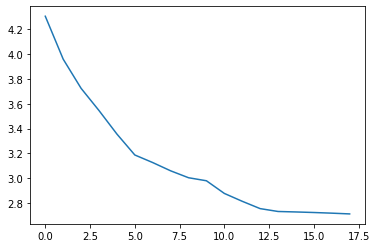

In [350]:
ax = plt.gca()
plt.plot(mixtures_df["err"])

In [351]:
(mixtures_df["res"].iloc[[15]] / 100).round(3)

,Shredded coconut,Almond flour,Sunflower seed flour,Yellow flaxseed meal,Flaxseed meal,Soy flour,Chicory,Carob powder,Cocoa powder,Sesame seed flour,Chickpea flour,Chestnut flour,Walnut flour,Oat flour,Dried strawberries,Banana chips,Peanuts
0.85,0.0,0.298,0.0,0.0,0.0,0.0,0.46,0.0,0.0,0.909,0.0,0.0,0.0,0.0,0.417,0.627,0.0
